# Importing Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Checking DataFrame

In [32]:
df = pd.read_csv('ds_salaries.csv')
df.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [33]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [35]:
df.duplicated().sum()

0

In [36]:
df.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [37]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [38]:
df['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

There are numerous job titles that exhibit significant similarities, which can pose challenges when interpreting results for visualization purposes. To address this concern, we will employ a machine learning model to cluster the data into categories that share similar characteristics.

In [39]:
# Convert job titles to numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['job_title'])

# Apply K-means clustering with 7 clusters
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Assign cluster labels to job titles
df['cluster_label'] = kmeans.labels_

# Rename the column
df.rename(columns={'job_title': 'Original Job Title'}, inplace=True)

# Define the new cluster names
cluster_job_titles = {
    0: 'Data Engineer',
    1: 'Data Scientist',
    2: 'Data Analyst',
    3: 'Data Head or Director',
    4: 'Machine Learning',
    5: 'Data Lead',
    6: 'Researcher',
    7: 'Other'
}

# Map the cluster labels to the new cluster names
df['cluster_job_title'] = df['cluster_label'].map(cluster_job_titles)

# Print the renamed clustered job titles
for cluster_label in range(n_clusters):
    cluster_jobs = df[df['cluster_label'] == cluster_label]['Original Job Title'].tolist()
    cluster_job_title = cluster_job_titles[cluster_label]
    print(f"Cluster {cluster_label + 1} ({cluster_job_title}): {cluster_jobs}")


Cluster 1 (Data Engineer): ['Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Da

In [40]:
df.head(3)

,Unnamed: 0,work_year,experience_level,employment_type,Original Job Title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,cluster_label,cluster_job_title
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,1,Data Scientist
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,4,Machine Learning
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,5,Data Lead


# EDA Analysis

### Histograms

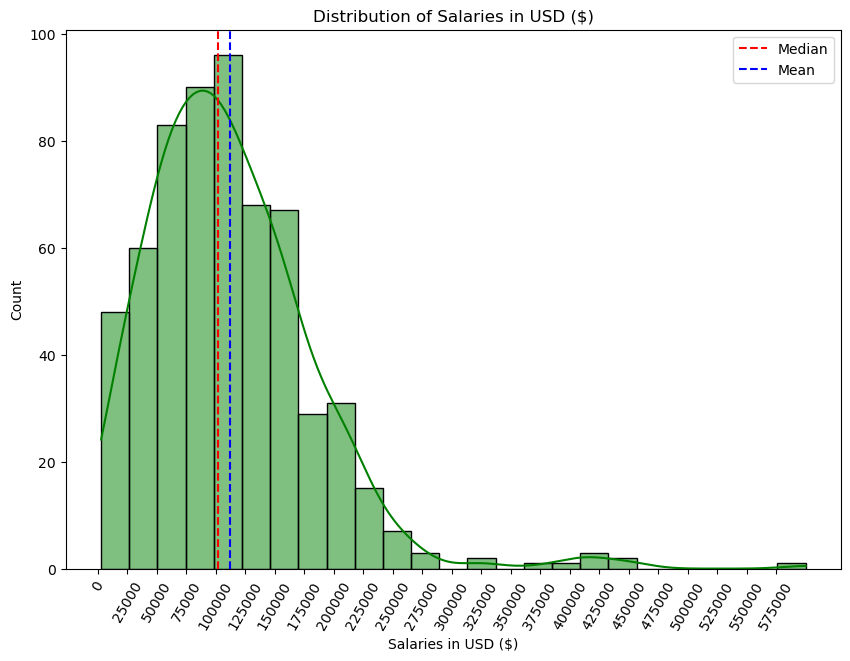

In [41]:
# Histograme distrinution of salary in USD
plt.figure(figsize=(10,7))
sns.histplot(df['salary_in_usd'], bins=25, color='Green', kde=True)
plt.xlabel('Salaries in USD ($)')
plt.xticks(range(0, df['salary_in_usd'].max(), 25000))
plt.xticks(rotation=60)
plt.title('Distribution of Salaries in USD ($)')

#Adding median line
median = np.median(df['salary_in_usd'])
mean = np.mean(df['salary_in_usd'])
plt.axvline(median, color='red', linestyle='--', label='Median')
plt.axvline(mean, color='blue', linestyle='--', label='Mean')
plt.legend()

The graph presented above provides a comprehensive overview of the salary distribution across the 606 Data employees. Upon analyzing the graph, it becomes evident that the median and mean values closely align with each other. Specifically, the median salary for individuals working in the field of Data is USD $100,000.00, while the mean average for Data professionals stands at approximately $112,500.00. The majority of professionals fall within the salary range of $25,000.00 to $150,000.00 per annum, although there exists a subgroup of individuals earning between $175,000.00 and $225,000.00 annually. It is important to emphasize that only a small fraction of individuals enjoy a higher salary range, with some reaching up to $600,000.00.

### Bar Chart

Text(0.5, 1.0, 'Number of Employees per Job Title')

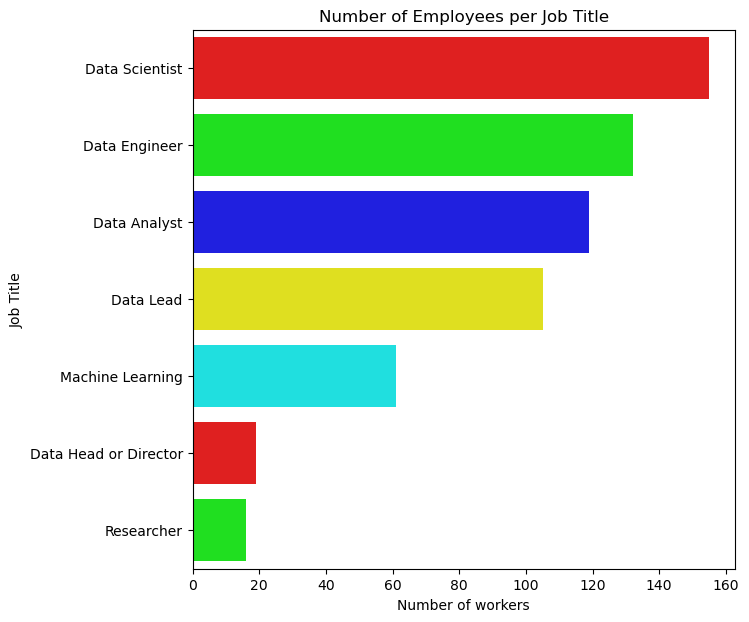

In [42]:
# Count the number of occurrences for each job title
job_title_counts = df['cluster_job_title'].value_counts()

# Set up the plot
plt.figure(figsize=(7, 7))
custom_palette = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF"]
order = job_title_counts.index

# Plot the bar chart
ax = sns.barplot(x=job_title_counts.values, y=order, palette=custom_palette, order=order)

# Set labels and title
plt.xlabel('Number of workers')
plt.ylabel('Job Title')
plt.title('Number of Employees per Job Title')

Based on the information presented in the "Number of Employees per Job Title" bar graph, it is evident that the top three most populated job titles are as follows:

1. Data Engineer
2. Data Analyst
3. Data Scientist

On the other hand, the three least populated job titles are:

1. Machine Learning
2. Data Head or Director
3. Researcher

It is noteworthy that there is significant disparity in the population of job titles overall. The distribution of professionals is relatively evenly spread for the top 3 job titles.

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

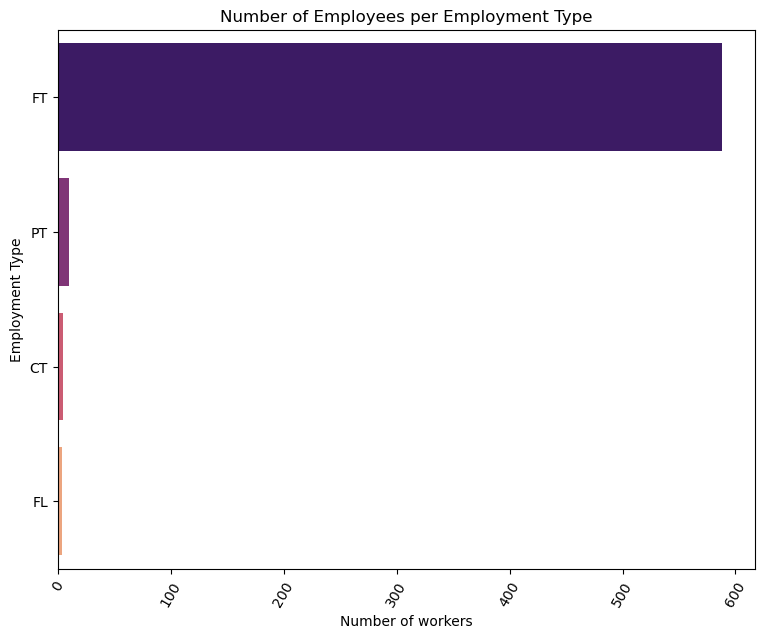

In [43]:
employment_type_counts = df['employment_type'].value_counts()

# Set up the plot
plt.figure(figsize=(9, 7))
order = employment_type_counts.index

# Plot the bar chart
ax = sns.barplot(x=employment_type_counts.values, y=order, palette='magma', order=order)

# Set labels and title
plt.xlabel('Number of workers')
plt.ylabel('Employment Type')
plt.title('Number of Employees per Employment Type')
plt.xticks(rotation=60)


The analysis of the employee distribution based on employment types reveals that the overwhelming majority of workers are engaged in full-time employment. Conversely, the least preferred type of employment is Freelancing.

Moreover, the levels of contract-based employment and freelancing are relatively similar, indicating a low preference for these arrangements compared to part-time work.

(array([0, 1, 2]), [Text(0, 0, '100'), Text(1, 0, '0'), Text(2, 0, '50')])

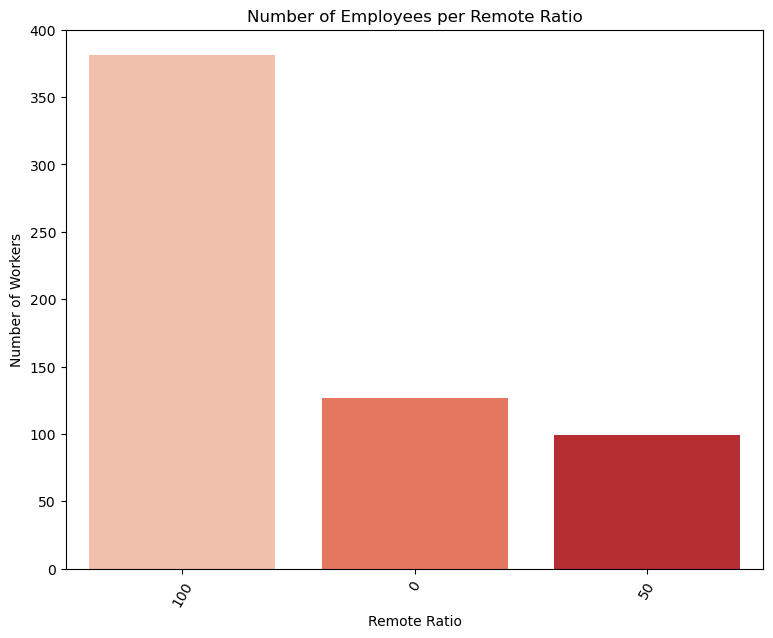

In [44]:
remote_ratio_counts = df['remote_ratio'].value_counts()

# Set up the plot
plt.figure(figsize=(9, 7))
order = remote_ratio_counts.index

# Plot the bar chart
ax = sns.barplot(x=order, y=remote_ratio_counts.values, palette='Reds', order=order)

# Set labels and title
plt.xlabel('Remote Ratio')
plt.ylabel('Number of Workers')
plt.title('Number of Employees per Remote Ratio')
plt.xticks(rotation=60)

The data presented in the above plot highlights a remarkable majority of employees who work on a full-time, in-person basis at their company headquarters. Following closely as the second most common arrangement for data professionals is remote working, with a relatively narrow gap in comparison. The least prevalent choice of working arrangement is hybrid work, where employees have a combination of remote and in-person work.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]),
 [Text(0, 0, 'US'),
  Text(1, 0, 'GB'),
  Text(2, 0, 'IN'),
  Text(3, 0, 'CA'),
  Text(4, 0, 'DE'),
  Text(5, 0, 'FR'),
  Text(6, 0, 'ES'),
  Text(7, 0, 'GR'),
  Text(8, 0, 'JP'),
  Text(9, 0, 'PT'),
  Text(10, 0, 'BR'),
  Text(11, 0, 'PK'),
  Text(12, 0, 'NL'),
  Text(13, 0, 'PL'),
  Text(14, 0, 'IT'),
  Text(15, 0, 'RU'),
  Text(16, 0, 'AE'),
  Text(17, 0, 'AT'),
  Text(18, 0, 'VN'),
  Text(19, 0, 'TR'),
  Text(20, 0, 'AU'),
  Text(21, 0, 'RO'),
  Text(22, 0, 'BE'),
  Text(23, 0, 'SG'),
  Text(24, 0, 'SI'),
  Text(25, 0, 'DK'),
  Text(26, 0, 'HU'),
  Text(27, 0, 'NG'),
  Text(28, 0, 'MX'),
  Text(29, 0, 'BO'),
  Text(30, 0, 'MY'),
  Text(31, 0, 'TN'),
  Text(32, 0, 'IE'),
  Text(33, 0, 'DZ'),
  Text(34, 0, 'AR'),
  Text(35, 0,

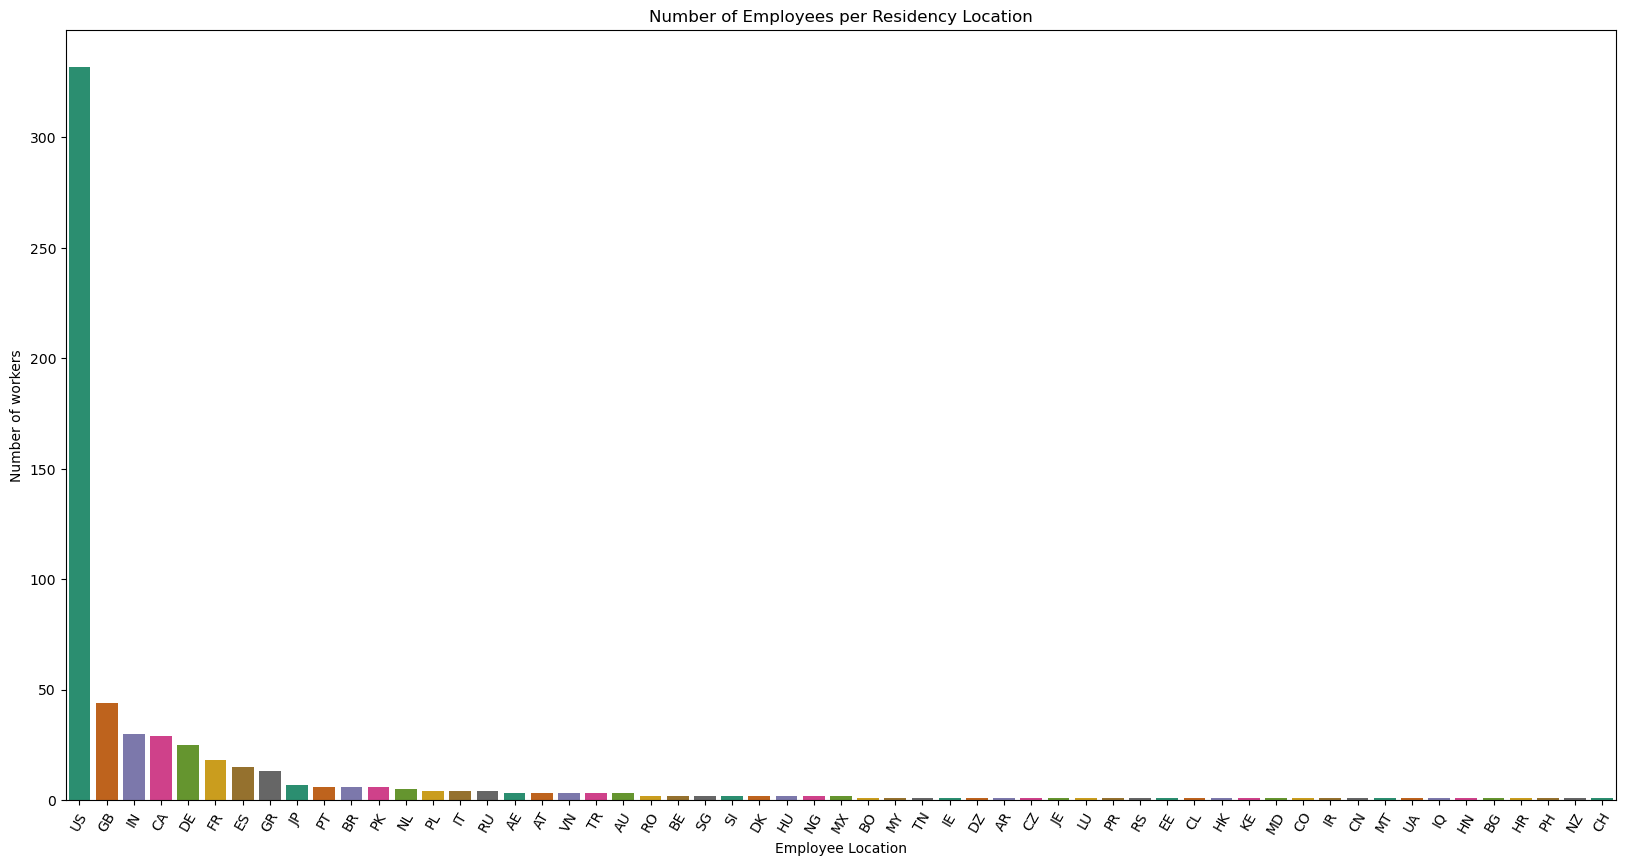

In [45]:
employe_location_counts = df['employee_residence'].value_counts()

# Set up the plot
plt.figure(figsize=(20, 10))
order = employe_location_counts.index

# Plot the bar chart with vertical bars
ax = sns.barplot(x=order, y=employe_location_counts.values, palette='Dark2', order=order)

# Set labels and title
plt.xlabel('Employee Location')
plt.ylabel('Number of workers')
plt.title('Number of Employees per Residency Location')
plt.xticks(rotation=60)


The depicted image provides a clear demonstration of the significant concentration of data professionals in the United States, with more than half of them residing in America. Following the United States, the next prominent countries with a substantial number of data professionals include the United Kingdom, Indonesia, Canada, Germany, and France. The remaining data professionals are dispersed across various countries worldwide.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'US'),
  Text(1, 0, 'GB'),
  Text(2, 0, 'CA'),
  Text(3, 0, 'DE'),
  Text(4, 0, 'IN'),
  Text(5, 0, 'FR'),
  Text(6, 0, 'ES'),
  Text(7, 0, 'GR'),
  Text(8, 0, 'JP'),
  Text(9, 0, 'NL'),
  Text(10, 0, 'AT'),
  Text(11, 0, 'PT'),
  Text(12, 0, 'PL'),
  Text(13, 0, 'LU'),
  Text(14, 0, 'PK'),
  Text(15, 0, 'BR'),
  Text(16, 0, 'AE'),
  Text(17, 0, 'MX'),
  Text(18, 0, 'AU'),
  Text(19, 0, 'TR'),
  Text(20, 0, 'DK'),
  Text(21, 0, 'IT'),
  Text(22, 0, 'CZ'),
  Text(23, 0, 'SI'),
  Text(24, 0, 'RU'),
  Text(25, 0, 'CH'),
  Text(26, 0, 'NG'),
  Text(27, 0, 'CN'),
  Text(28, 0, 'BE'),
  Text(29, 0, 'VN'),
  Text(30, 0, 'EE'),
  Text(31, 0, 'AS'),
  Text(32, 0, 'DZ'),
  Text(33, 0, 'MY'),
  Text(34, 0, 'MD'),
  Text(35, 0, 'KE'),
  Text(36, 0, 'SG'),
  Text(

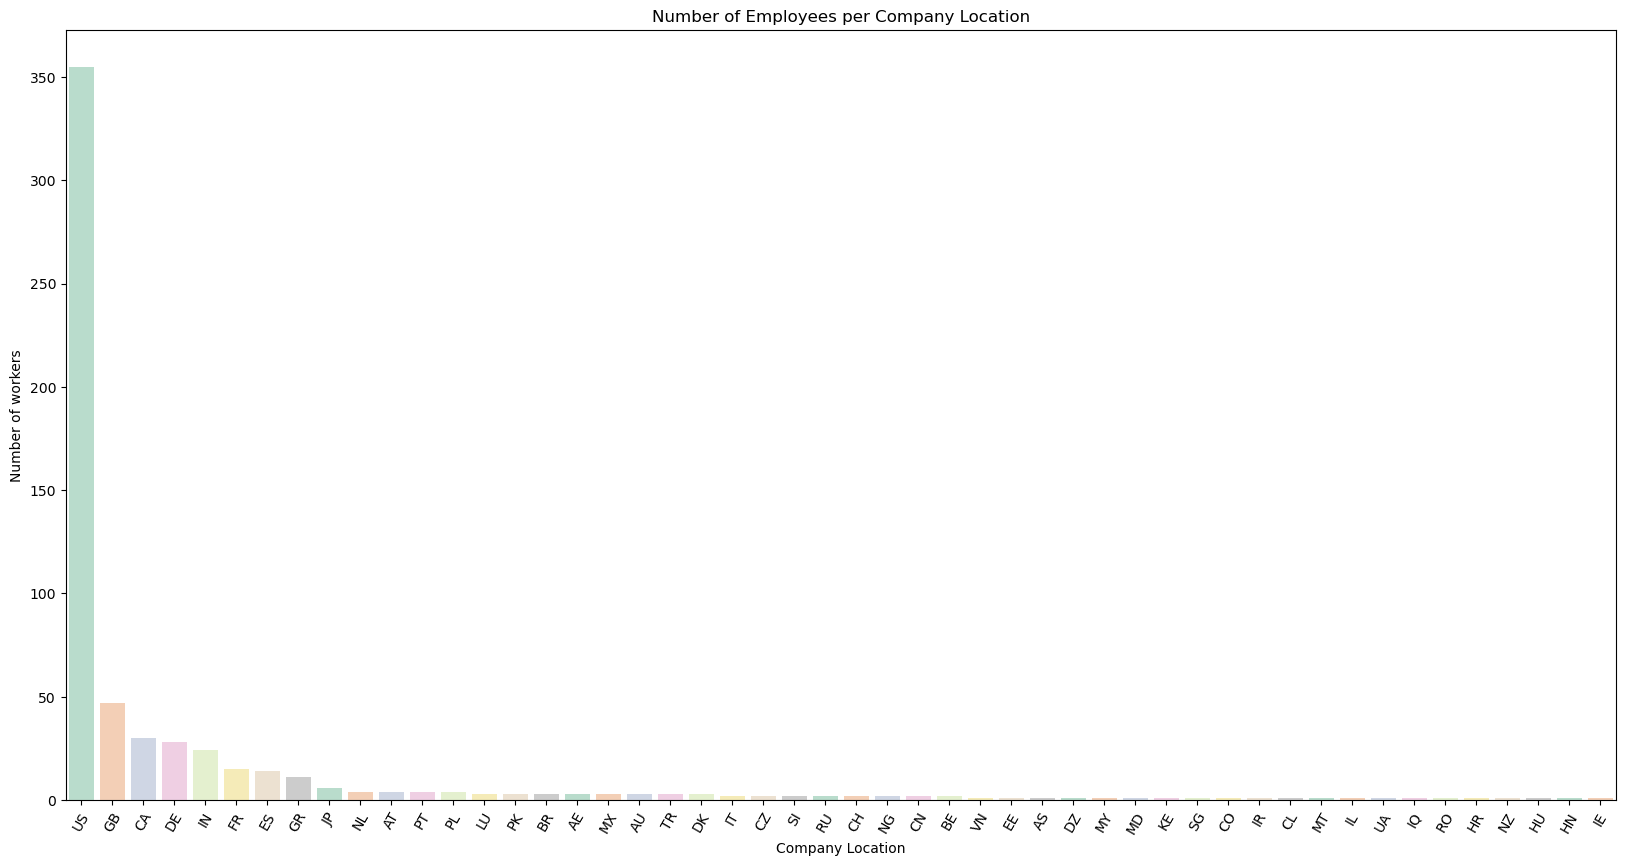

In [46]:
company_location_counts = df['company_location'].value_counts()

# Set up the plot
plt.figure(figsize=(20, 10))
order = company_location_counts.index

# Plot the bar chart with vertical bars
ax = sns.barplot(x=order, y=company_location_counts.values, palette='Pastel2', order=order)

# Set labels and title
plt.xlabel('Company Location')
plt.ylabel('Number of workers')
plt.title('Number of Employees per Company Location')
plt.xticks(rotation=60)

According to the displayed graph, it is evident that the majority of companies where the workers are employed have an American origin. Following closely are companies primarily located in the United Kingdom, Canada, and Germany. The remaining companies are distributed among various other countries.

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

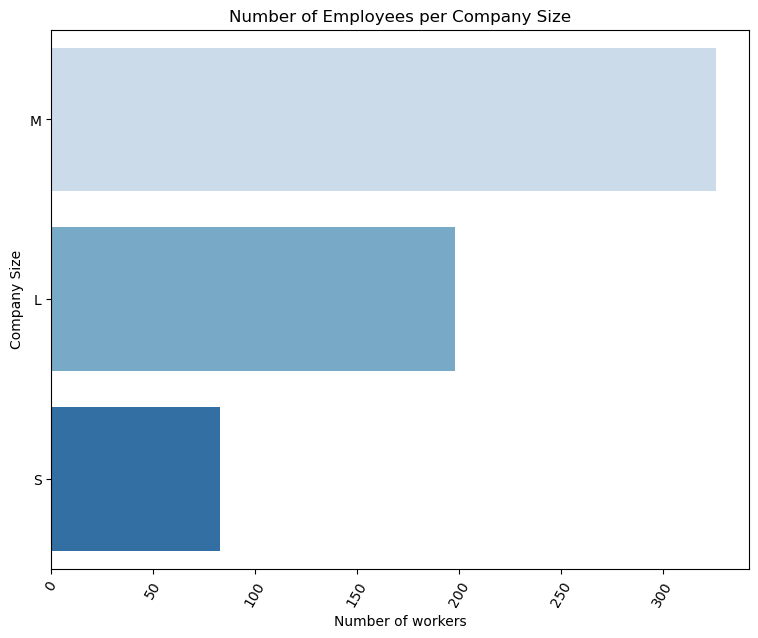

In [47]:
company_size_counts = df['company_size'].value_counts()

# Set up the plot
plt.figure(figsize=(9, 7))
order = company_size_counts.index

# Plot the bar chart
ax = sns.barplot(x=company_size_counts.values, y=order, palette='Blues', order=order)

# Set labels and title
plt.xlabel('Number of workers')
plt.ylabel('Company Size')
plt.title('Number of Employees per Company Size')
plt.xticks(rotation=60)

A significant majority, comprising more than half of the employees, are currently employed in medium-sized companies. Approximately one-third of the workforce is engaged in large-cap companies. In contrast, a minority, numbering fewer than 100 individuals, work in small companies.

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

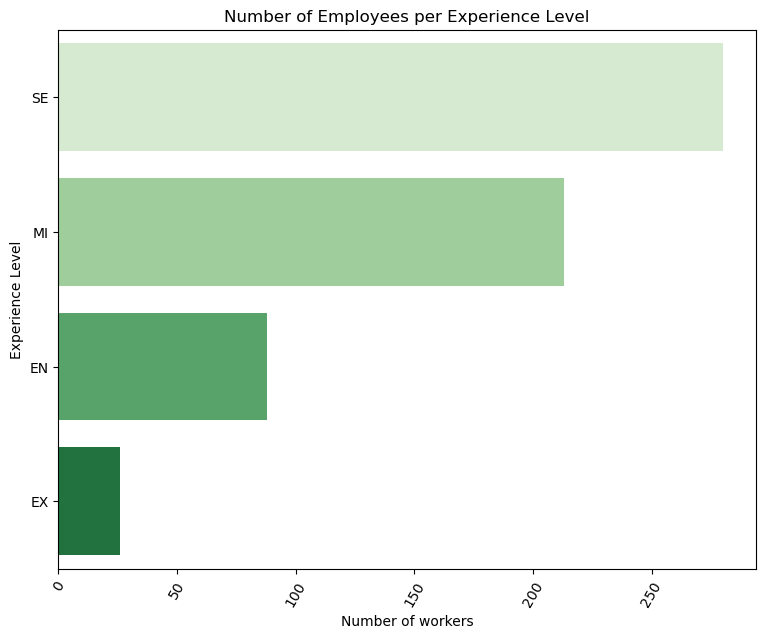

In [48]:
experience_level_counts = df['experience_level'].value_counts()

# Set up the plot
plt.figure(figsize=(9, 7))
order = experience_level_counts.index

# Plot the bar chart
ax = sns.barplot(x=experience_level_counts.values, y=order, palette='Greens', order=order)

# Set labels and title
plt.xlabel('Number of workers')
plt.ylabel('Experience Level')
plt.title('Number of Employees per Experience Level')
plt.xticks(rotation=60)

Based on the experience level analysis, it is evident that nearly half of the professionals are categorized as senior level. A slightly higher number, just above 200 individuals, are classified as middle level. Less than one-sixth of the professionals are considered to be at the entry level, indicating a relatively smaller portion. Lastly, there is a very small minority of professionals at the executive level.

### Box Plot

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Data Scientist'),
  Text(1, 0, 'Machine Learning'),
  Text(2, 0, 'Data Lead'),
  Text(3, 0, 'Data Analyst'),
  Text(4, 0, 'Data Engineer'),
  Text(5, 0, 'Data Head or Director'),
  Text(6, 0, 'Researcher')])

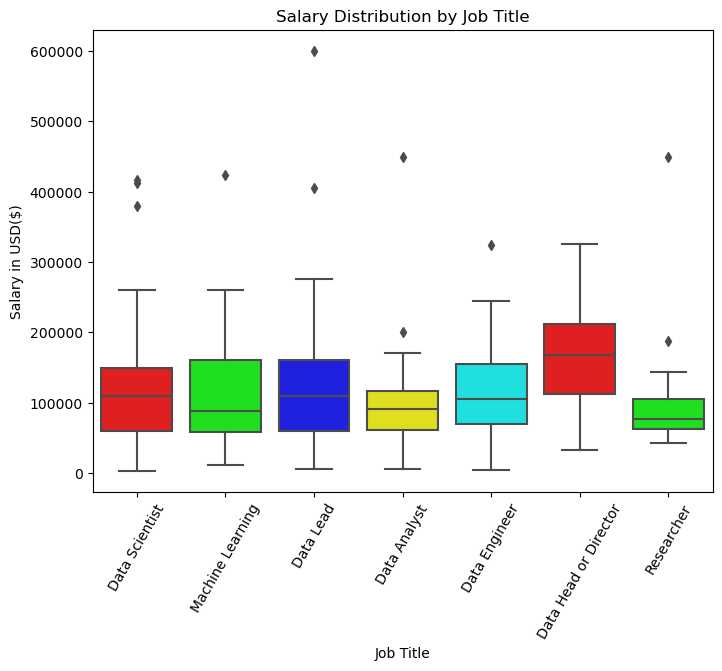

In [49]:
#Salary distrib by job type
# Generate a custom color palette
num_categories = len(df['cluster_job_title'].unique())
custom_palette = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF"]

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='cluster_job_title', y='salary_in_usd', palette=custom_palette)
plt.xlabel('Job Title')
plt.ylabel('Salary in USD($)')
plt.title('Salary Distribution by Job Title')
plt.xticks(rotation=60)

It is apparent that across various job titles, it is not uncommon to find one or two employees earning significantly higher salaries within their respective roles. Conversely, for the Data Analyst and Researcher job titles, the mean and average salary ranges appear comparatively lower than other job titles. The Data Head or Director role stands out with the highest salary range and average wage among specific job titles. The remaining job titles generally exhibit a similar salary range, although Data Science and Data Lead roles tend to have slightly higher average salaries compared to ML and Data Engineers.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'FT'), Text(1, 0, 'CT'), Text(2, 0, 'PT'), Text(3, 0, 'FL')])

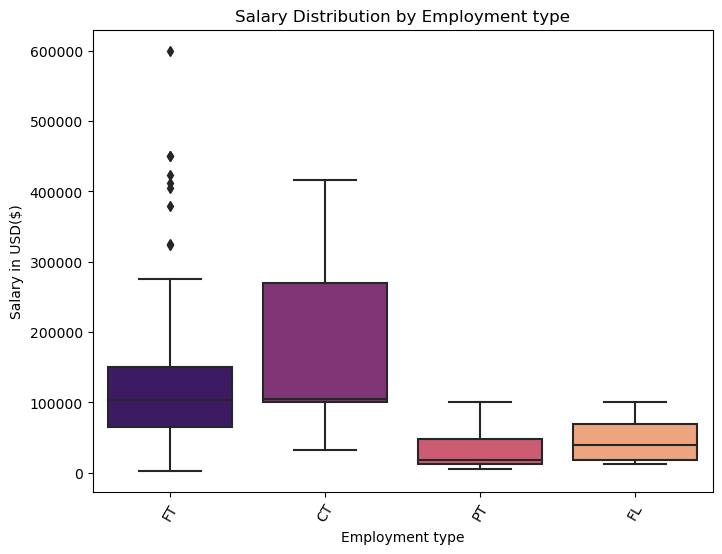

In [50]:
# Employment type
# Generate a custom color palette
num_categories = len(df['employment_type'].unique())
custom_palette = sns.color_palette('magma', num_categories)

# Create a boxplot with the custom color palette
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='employment_type', y='salary_in_usd', palette=custom_palette)
plt.xlabel('Employment type')
plt.ylabel('Salary in USD($)')
plt.title('Salary Distribution by Employment type')
plt.xticks(rotation=60)

It is interesting to note that among full-time workers, who constitute the most common category of workers, there is a wide salary range from $0.00 to $280,000.00. While the majority of full-time employees have salaries in the average range of $100,000.00, there are also several individuals in high-paying positions.

On the other hand, contract workers have a slightly higher average salary and a broader salary range, spanning from $30,000.00 to $400,000.00. In contrast, both freelancers and part-time workers have relatively low and similar salary ranges. However, it is worth mentioning that freelancers tend to have a slightly higher average salary compared to part-time workers.

(array([0, 1, 2]), [Text(0, 0, 'L'), Text(1, 0, 'S'), Text(2, 0, 'M')])

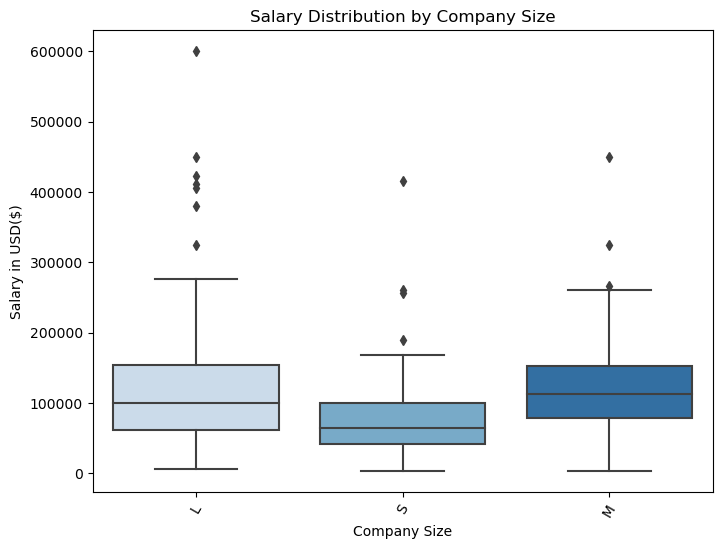

In [51]:
# company size
# Generate a custom color palette
num_categories = len(df['company_size'].unique())
custom_palette = sns.color_palette('Blues', num_categories)

# Create a boxplot with the custom color palette
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='company_size', y='salary_in_usd', palette=custom_palette)
plt.xlabel('Company Size')
plt.ylabel('Salary in USD($)')
plt.title('Salary Distribution by Company Size')
plt.xticks(rotation=60)

The analysis of salary distribution by company size reveals interesting trends. Larger companies tend to exhibit a higher salary range overall, with a few individuals earning exceptionally high salaries, reaching up to $600,000.00, which represents the highest paying salary among all data workers. On average, large companies offer a salary of $100,000.00.

In contrast, medium-sized companies have a slightly higher average salary of $110,000.00, despite having a narrower salary range. Within medium-sized companies, there are three high-paying positions with salaries up to $450,000.00.

Small companies, on the other hand, display a considerably smaller salary range and an average salary lower than $100,000.00. Similarly, there are three high-paying positions within small companies, with a maximum salary of $410,000.00.

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '50'), Text(2, 0, '100')])

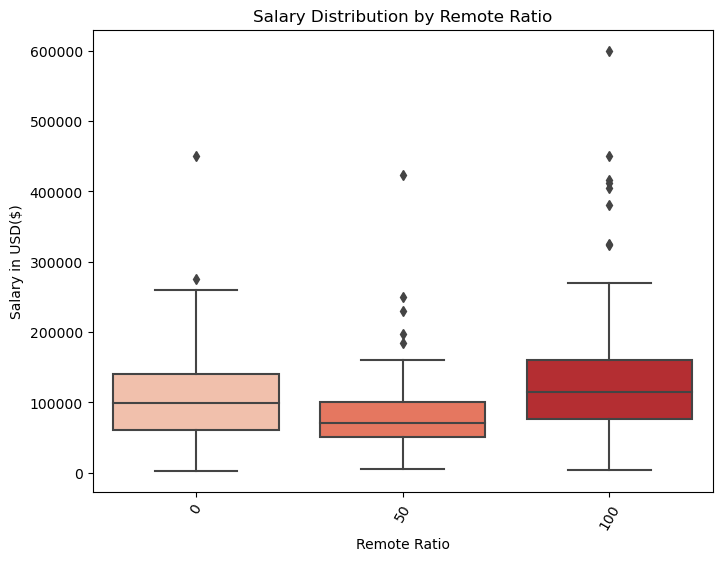

In [52]:
# remote_ratio
# Generate a custom color palette
num_categories = len(df['remote_ratio'].unique())
custom_palette = sns.color_palette('Reds', num_categories)

# Create a boxplot with the custom color palette
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='remote_ratio', y='salary_in_usd', palette=custom_palette)
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD($)')
plt.title('Salary Distribution by Remote Ratio')
plt.xticks(rotation=60)

The depicted box plot indicates that the salary ranges for remote workers and those who work exclusively at the office are quite similar. However, there is a slight difference in the average salary, with full-time office workers having a slightly higher average. Moreover, the box plot reveals that there are more individuals in the higher salary brackets among full-time office workers.

In contrast, for workers with a hybrid arrangement (combining remote and in-office work), both the salary range and average wage are noticeably lower compared to the other two working options.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'MI'), Text(1, 0, 'SE'), Text(2, 0, 'EN'), Text(3, 0, 'EX')])

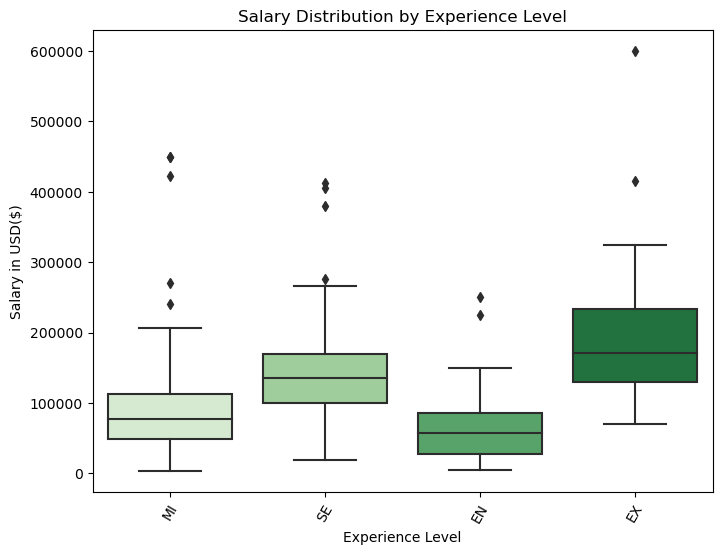

In [53]:
#Experience Level
# Generate a custom color palette
num_categories = len(df['experience_level'].unique())
custom_palette = sns.color_palette('Greens', num_categories)

# Create a boxplot with the custom color palette
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette=custom_palette)
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD($)')
plt.title('Salary Distribution by Experience Level')
plt.xticks(rotation=60)

The salary distribution based on experience level aligns with expectations, with executive-level professionals commanding the highest salary range and average. Their salary range spans from $75,000.00 to $310,000.00, with an average of $180,000.00. Notably, the highest paying salary in this category reaches $600,000.00.

The second-highest paying experience level is the senior level, with a salary range of $20,000.00 to $200,000.00 and an average of $130,000.00. The highest reported salary for senior-level professionals is $410,000.00.

For professionals at the middle level, the salary range extends from $0.00 to slightly over $200,000.00, with an average just below $100,000.00. The highest reported salary for this category is $450,000.00.

The entry-level experience level exhibits the lowest salary range, ranging from $0.00 to $150,000.00, with an average of $50,000.00. The highest reported salary at the entry level is $250,000.00.

### Pie Chart

Text(0.5, 1.0, 'Distribution by Experience Level')

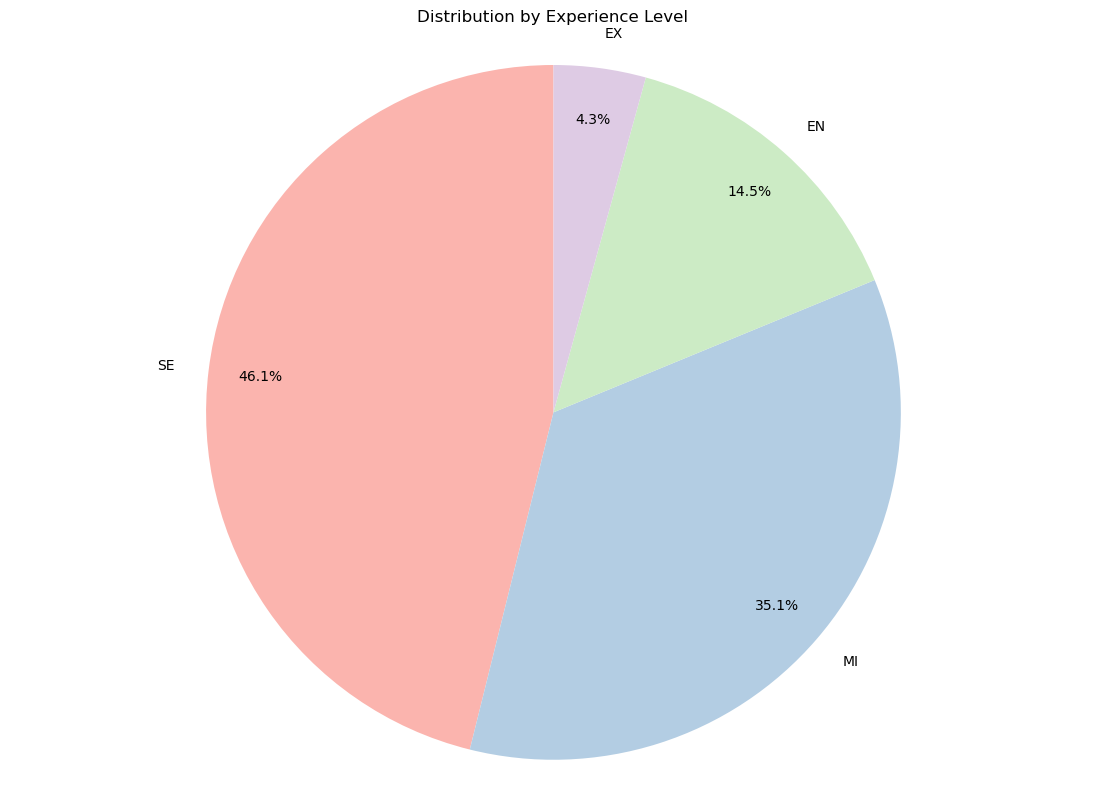

In [54]:
# Pie chart with the experience level
bldp_count = df['experience_level'].value_counts()
label_props = {'fontsize': 12, 'fontweight': 'bold'}
plt.figure(figsize=(14, 10))
sns.set_palette('Pastel1')
plt.pie(bldp_count, labels=bldp_count.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.axis('equal') 
plt.title('Distribution by Experience Level')

Text(0.5, 1.0, 'Distribution by Remote Ratio')

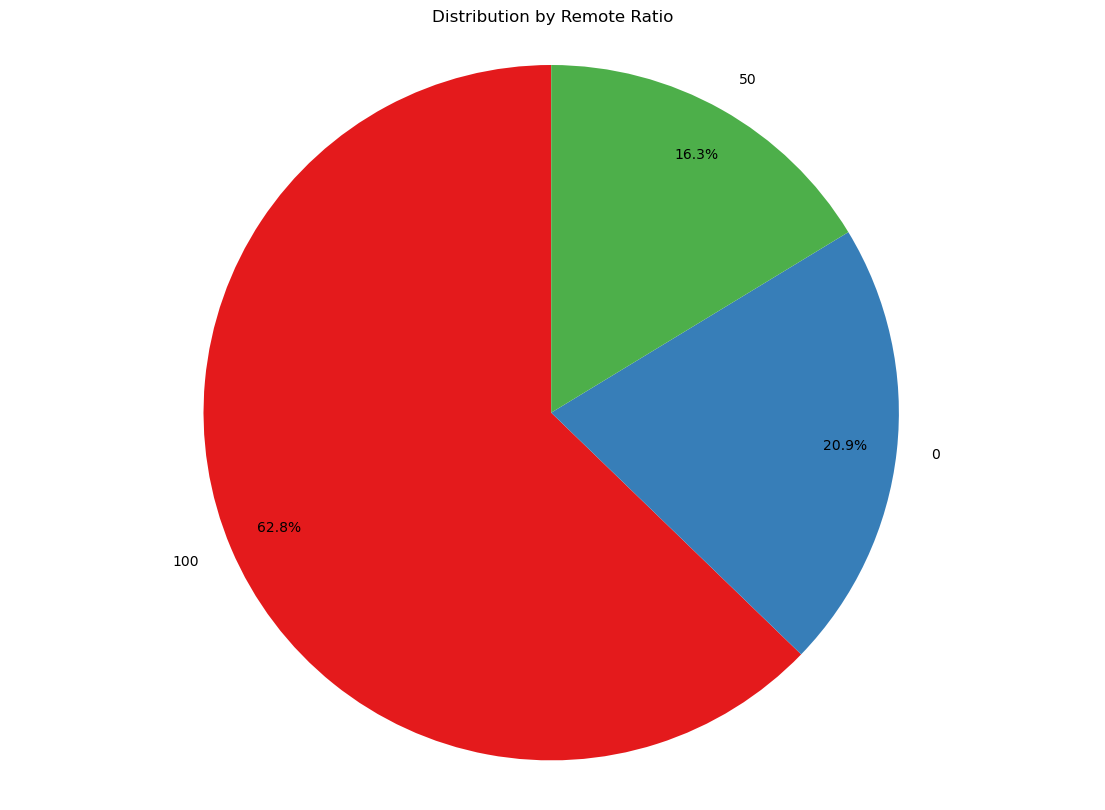

In [55]:
#Pie chart of remote ration
bldp_count = df['remote_ratio'].value_counts()
label_props = {'fontsize': 12, 'fontweight': 'bold'}
plt.figure(figsize=(14, 10))
sns.set_palette('Set1')
plt.pie(bldp_count, labels=bldp_count.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.axis('equal') 
plt.title('Distribution by Remote Ratio')

Text(0.5, 1.0, 'Distribution by Company Size')

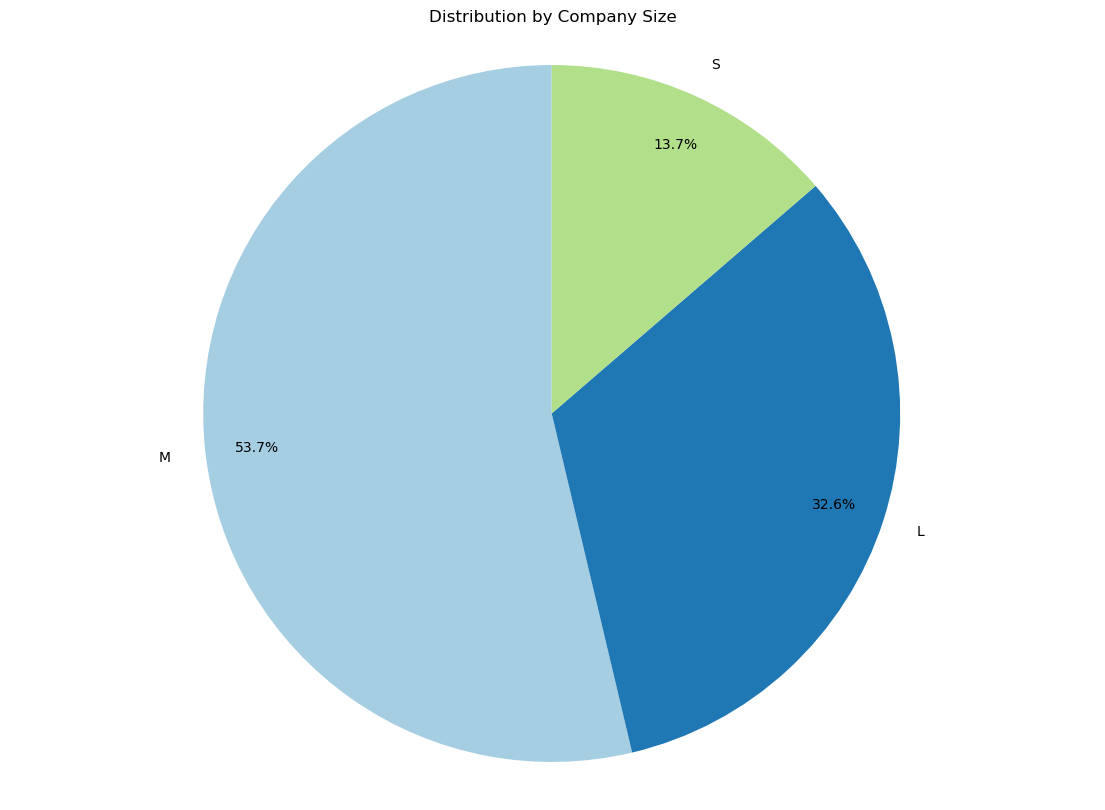

In [56]:
#Pie chart of the company size
bldp_count = df['company_size'].value_counts()
label_props = {'fontsize': 12, 'fontweight': 'bold'}
plt.figure(figsize=(14, 10))
sns.set_palette('Paired')
plt.pie(bldp_count, labels=bldp_count.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.axis('equal') 
plt.title('Distribution by Company Size')

Text(0.5, 1.0, 'Distribution by Job Title')

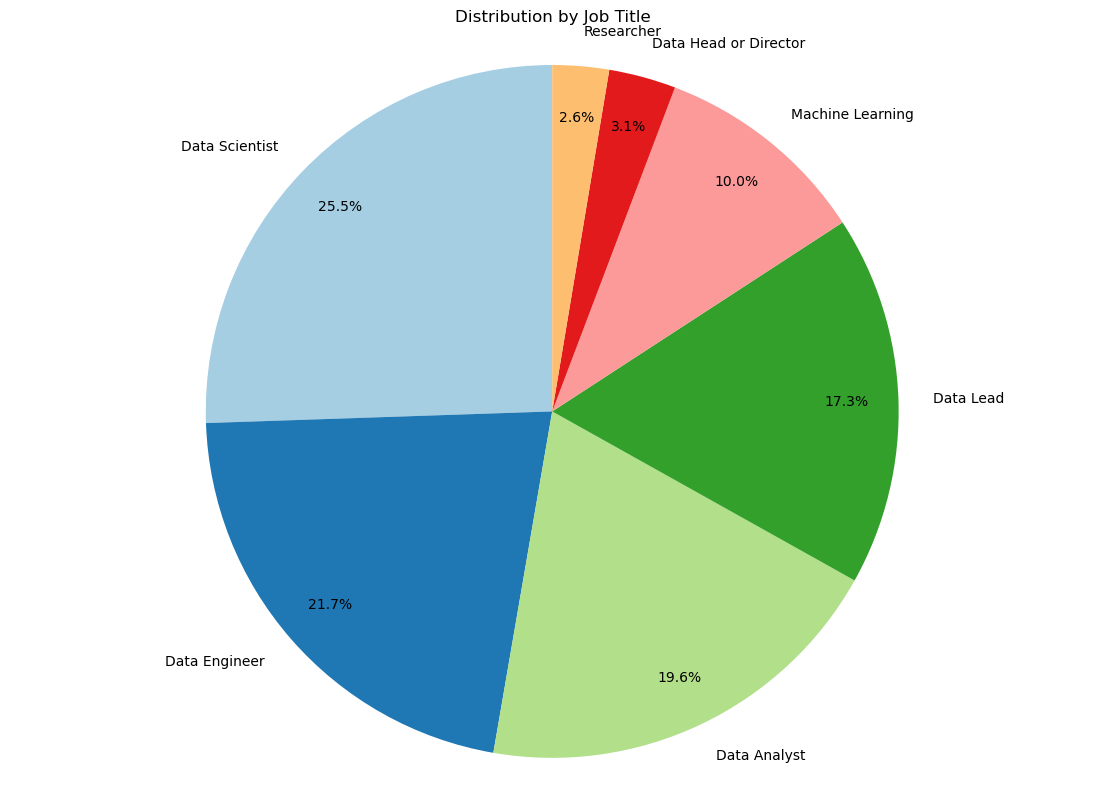

In [57]:
#Comapny location
bldp_count = df['cluster_job_title'].value_counts()
label_props = {'fontsize': 12, 'fontweight': 'bold'}
plt.figure(figsize=(14, 10))
sns.set_palette('Paired')
plt.pie(bldp_count, labels=bldp_count.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.axis('equal') 
plt.title('Distribution by Job Title')

### Heatmap

Text(0.5, 1.0, 'Correlation Matrix for the Data Science Salaries data')

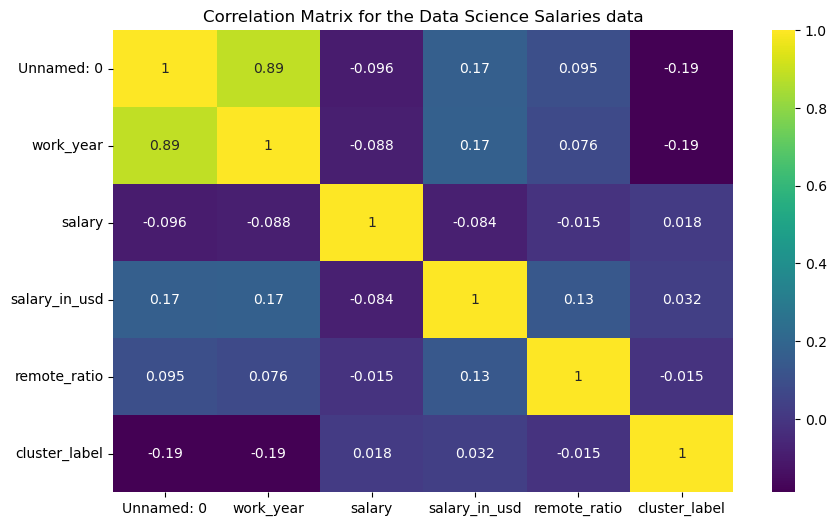

In [58]:
# Correlation Matrix of all of the variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix for the Data Science Salaries data')

Based on the analysis, it appears that there is no significant correlation between the different types of variables that could explain the observed values or their impact on one another. The variables examined, such as job titles, employment types, company sizes, geographical locations, and experience levels, do not show clear patterns of influence or interdependence. Therefore, it can be concluded that these variables operate independently of each other and do not exhibit strong correlations or explanatory relationships.

### Stacked Bar Chart

<Figure size 1200x800 with 0 Axes>

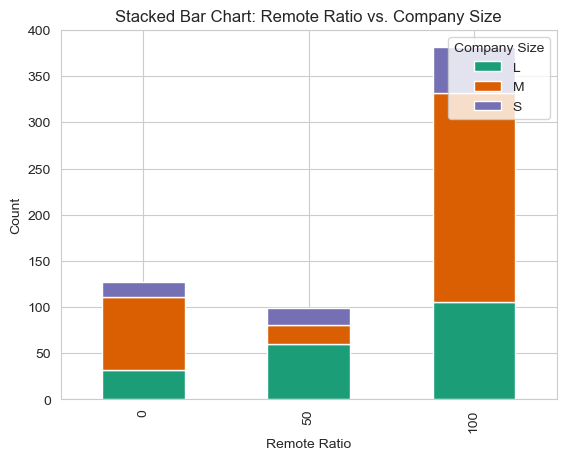

In [59]:
# Remote Ratio vs. company size
df_counts = df.groupby(['remote_ratio', 'company_size']).size().unstack()

palette = sns.color_palette("Dark2", 8) 

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
df_counts.plot(kind='bar', stacked=True, color=palette)
plt.xlabel('Remote Ratio')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Remote Ratio vs. Company Size')
plt.legend(title='Company Size', loc='upper right')

<Figure size 1200x800 with 0 Axes>

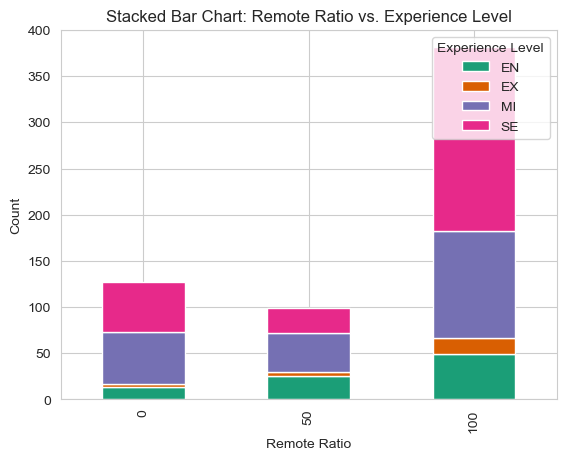

In [60]:
# Remote Ratio vs. experience level
df_counts = df.groupby(['remote_ratio', 'experience_level']).size().unstack()

palette = sns.color_palette("Dark2", 8) 

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
df_counts.plot(kind='bar', stacked=True, color=palette)
plt.xlabel('Remote Ratio')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Remote Ratio vs. Experience Level')
plt.legend(title='Experience Level', loc='upper right')

### Pair Plot 

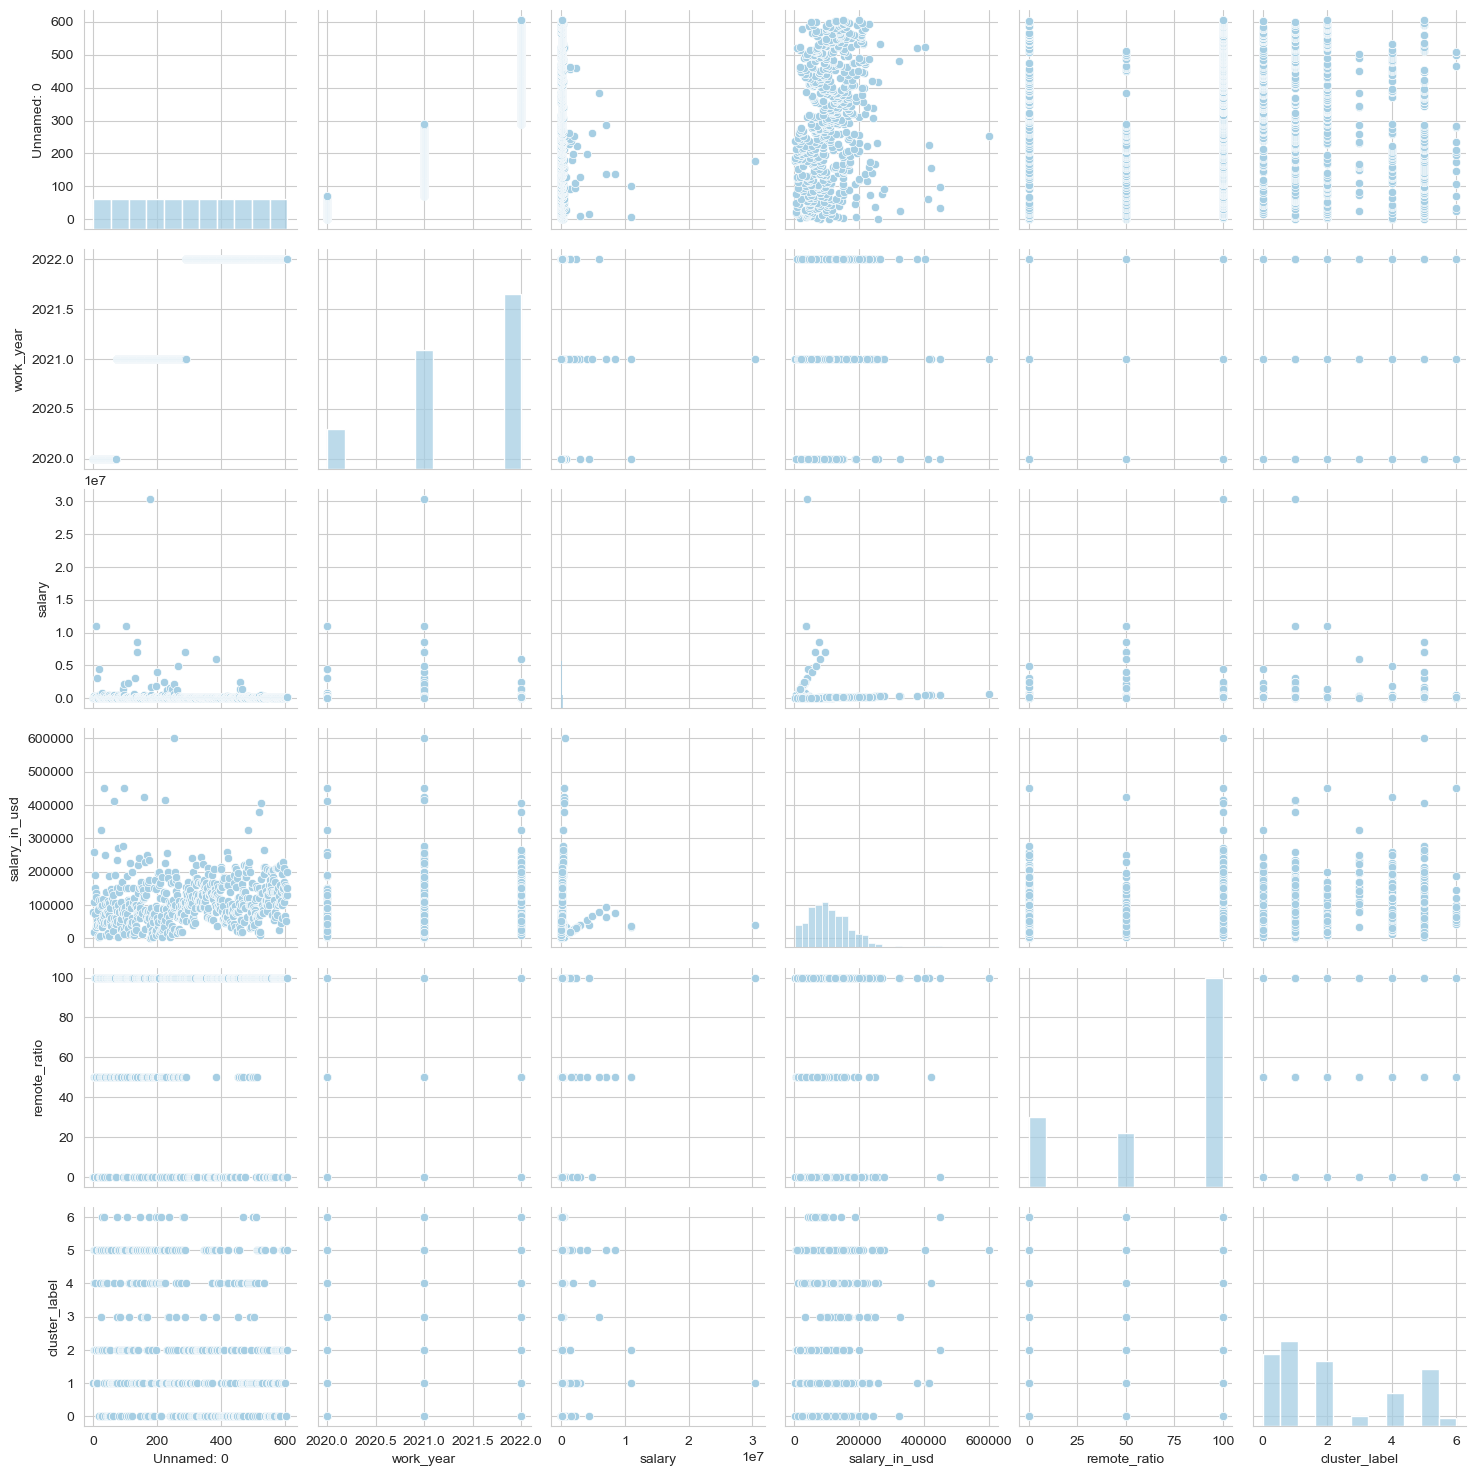

In [61]:
# Pair plot of all ofthe variables
sns.pairplot(df)